## Trend Following Strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SPY.csv", parse_dates=True, index_col="Date")

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
df["LogReturns"] = np.log(df["Close"]).diff()

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturns
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322


In [6]:
df["LogReturns"] = df["LogReturns"].shift(-1)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturns
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,0.002644
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.000704
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.004212
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.003322
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.001396


In [8]:
# Le finestre saranno sistemate. Per ora usiamo 30 per la slow e 10 per la fast
df["SlowSMA"] = df["Close"].rolling(30).mean()
df["FastSMA"] = df["Close"].rolling(10).mean()

<Axes: xlabel='Date'>

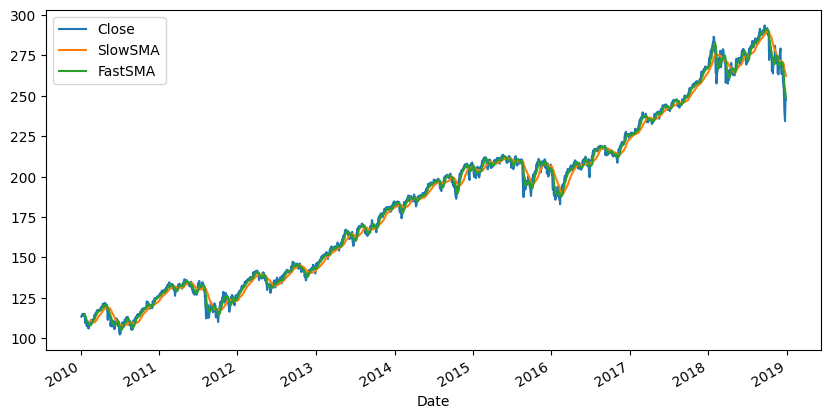

In [9]:
df[["Close", "SlowSMA", "FastSMA"]].plot(figsize=(10, 5))

<Axes: xlabel='Date'>

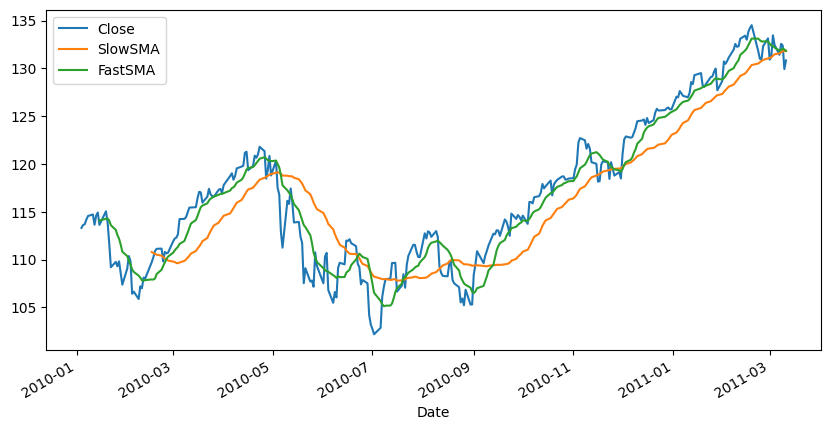

In [10]:
df[["Close", "SlowSMA", "FastSMA"]].iloc[:300].plot(figsize=(10, 5))

In [11]:
# Gli argomenti dopo la condizione dicono di ritornare il primo valore se è True, il secondo se è False
# E' come se fosse un if statemente vettorializzato
df["Signal"] = np.where(df["FastSMA"] >= df["SlowSMA"], 1, 0)

In [12]:
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturns,SlowSMA,FastSMA,Signal
Date,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0


In [13]:
df["PrevSignal"] = df["Signal"].shift(1)
df["Buy"] = (df["PrevSignal"] == 0) & (df["Signal"]==1)
df["Sell"] = (df["PrevSignal"] == 1) & (df["Signal"]==0)

In [14]:
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturns,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell
Date,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0,1.0,False,True
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0,0.0,False,False
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0,0.0,False,False
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0,0.0,False,False


In [15]:
is_invested = False

# Questa funzione si applica sulle singole righe del DataFrame e l'argomento sarà quello.
# L'uso della variabile globale ci permette di tenere traccia per ogni riga lo stato di is_invested, aggiornandosi di conseguenza
# una variabile global cambia valore anche fuori dalla funzione
def assign_is_invested(row):
    global is_invested
    if is_invested and row["Sell"]:
        is_invested = False
    if not is_invested and row["Buy"]:
        is_invested = True

    # Otherwise, keep value
    return is_invested

In [16]:
# L'uso di axis = 1 dice di assegnare il nuovo risultato ad una colonna
df["IsInvested"] = df.apply(assign_is_invested, axis=1)

In [17]:
df["AlgoLogReturn"] = df["IsInvested"] * df["LogReturns"]

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturns,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell,IsInvested,AlgoLogReturn
Date,,,,,,,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,0.002644,NaN,NaN,0,NaN,False,False,False,0.0
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.000704,NaN,NaN,0,0.0,False,False,False,0.0
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.004212,NaN,NaN,0,0.0,False,False,False,0.0
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.003322,NaN,NaN,0,0.0,False,False,False,0.0
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.001396,NaN,NaN,0,0.0,False,False,False,0.0


In [19]:
# Ritorno con Algoritmic Trading: 30%
df["AlgoLogReturn"].sum()

0.3049019540291429

In [20]:
# Ritorno con Investimenti passivi (Buy & Hold): 78%
df["LogReturns"].sum()

0.782116240308401

In [21]:
# Calcoliamo std_dev e Sharpe Ratio:
df["AlgoLogReturn"].std(), df["AlgoLogReturn"].mean()/df["AlgoLogReturn"].std()

(0.00608988006417083, 0.022133947090060876)

In [22]:
# Notiamo come quello non algoritmico ha uno Sharpe Ratio maggiore, seppure abbia un rischio maggiore.
# Quindi per ora buy and Hold è ancora meglio
df["LogReturns"].std(), df["LogReturns"].mean()/df["LogReturns"].std()

(0.009446971193167572, 0.036600423640896725)

### Ottimizzazione delle finestre temporali

Per farlo divideremo il dataset in un train set ed un test set. Useremo il train set per trovare le finestre temporali ottime. Trovate queste finestre, valuteremo il modello su entrambi. Nel linguaggio del machine learning, sarebbe il validation set.

In [23]:
N_test = 1000
def trend_following_strategy(df, fast, slow):
    global is_invested

    df["SlowSMA"] = df["Close"].rolling(slow).mean()
    df["FastSMA"] = df["Close"].rolling(fast).mean()
    df["Signal"] = np.where(df["FastSMA"] >= df["SlowSMA"], 1, 0)
    df["PrevSignal"] = df["Signal"].shift(1)
    df["Buy"] = (df["PrevSignal"] == 0) & (df["Signal"]==1)
    df["Sell"] = (df["PrevSignal"] == 1) & (df["Signal"]==0)
    
    # Facciamo la divisione qui e non prima, altrimenti i missing values creati dalla SMA li avremmo in entrambi i dataframes
    train = df.iloc[:-N_test]
    test = df.iloc[-N_test:]

    # Siccome non possiamo fare df.loc[:-N_test, 'IsInvested'], dobbiamo usare questa strategia degli indici
    train_idx = df.index <= train.index[-1]
    test_idx = df.index > train.index[-1]

    is_invested = False
    df.loc[train_idx, 'IsInvested'] = train.apply(assign_is_invested, axis=1)
    df.loc[train_idx, 'AlgoLogReturn'] = train["IsInvested"] * train["LogReturns"]

    is_invested = False
    df.loc[test_idx, 'IsInvested'] = test.apply(assign_is_invested, axis=1)
    df.loc[test_idx, 'AlgoLogReturn'] = test["IsInvested"] * test["LogReturns"]

    # Qui escludiamo l'ultimo valore. Questa cosa non avrà senso ora, ma lo avrà in futuro
    # C'è da capire perchè usa train e test in questo modo, come se venissero aggiornati
    # Intuitivamente, pensando al test set, non avrà returns nell'ultimo giorno a causa dello shifting.
    # Per tenere le cose in linea col futuro, ci portiamo avanti questa accortezza
    return train['AlgoLogReturn'][:-1].sum(), test['AlgoLogReturn'][:-1].sum(), 

In [24]:
trend_following_strategy(df, 10, 30)

(0.21371231572709082, 0.09118963830205207)

In [25]:
### Approccio Grid Search
best_fast = None
best_slow = None
best_score = float("-inf")
# Settiamo prima fast, in quanto la slow deve essere almeno x volte più grande
for fast in range(3, 30):
    for slow in range(fast + 5, 80):
        # lo score che otteniamo è come se fosse il "train_score". Usiamo quello per cercare i parametri
        score, _ = trend_following_strategy(df, fast, slow)
        if score > best_score:
            best_fast = fast
            best_slow = slow
            best_score = score

trend_following_strategy(df, best_fast, best_slow), best_fast, best_slow

((0.43459304796456966, 0.08889132894199303), 16, 33)

In [26]:
train = df.iloc[:-N_test].copy()
test = df.iloc[-N_test:].copy()

In [27]:
# Returns per buy-and-hold strategy
train["LogReturns"][:-1].sum(), test["LogReturns"][:-1].sum()

(0.5970866514889401, 0.19307543946998518)

In [28]:
# Sharpe Ratio Train Set
train["AlgoLogReturn"].mean()/train["AlgoLogReturn"].std(), train["LogReturns"].mean()/train["LogReturns"].std()

(0.04948919836831117, 0.046428678368196585)

In [29]:
# Sharpe Ratio Test Set
test["AlgoLogReturn"].mean()/test["AlgoLogReturn"].std(), test["LogReturns"].mean()/test["LogReturns"].std()

(0.016179303103406005, 0.022384106381325413)

<Axes: xlabel='Date'>

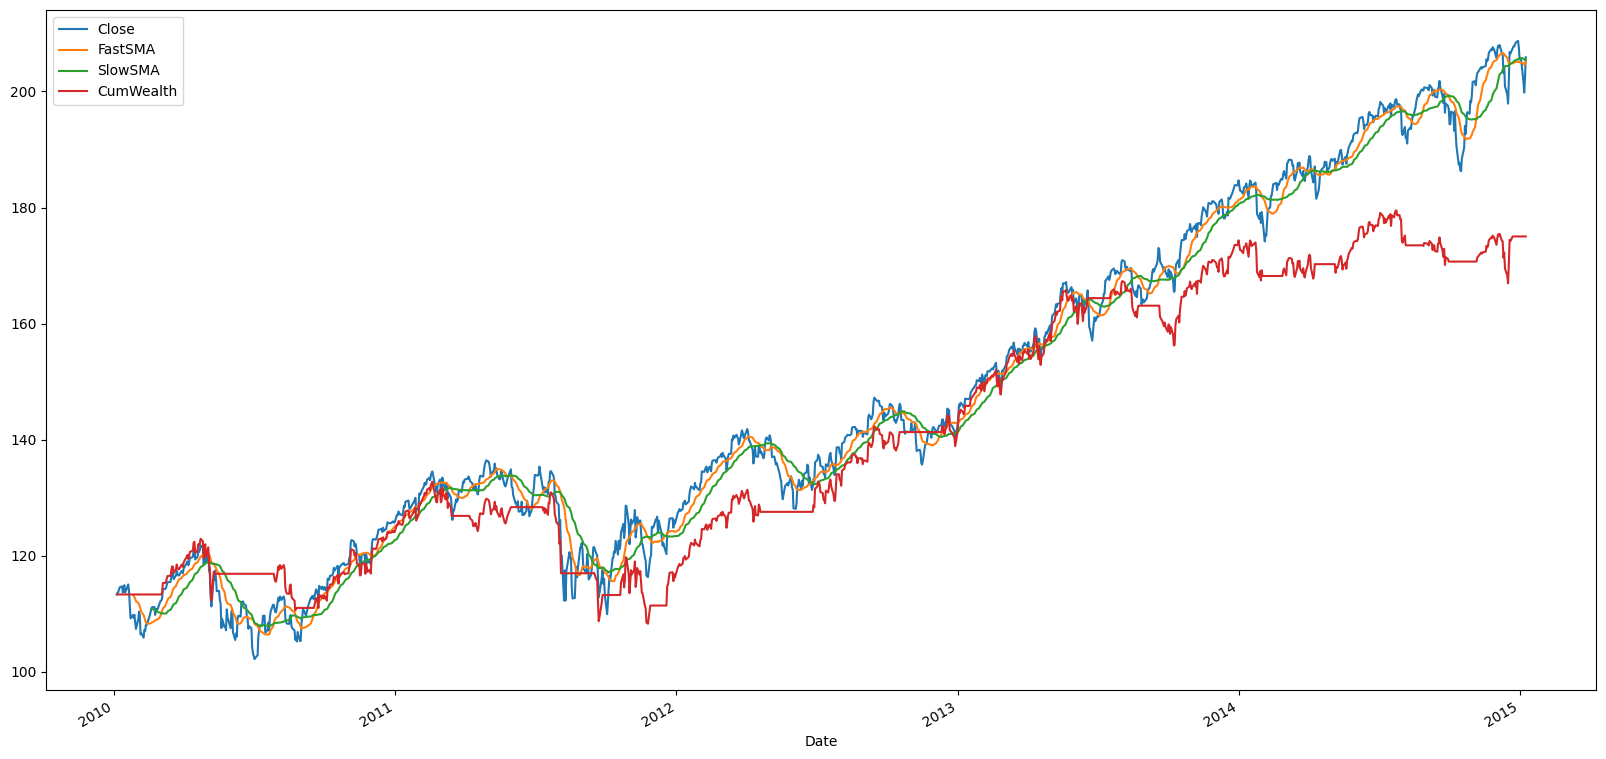

In [30]:
# Creiamo un logReturn cumulativo in tutto il periodo di investimento. Shiftiamo di 1 per ritornare al posto giusto
train["CumLogReturn"] = train["AlgoLogReturn"].cumsum().shift(1)
# Calcoliamo, sulla base del prezzo di base e del ritorno cumulativo, l'andamento dei soldi
train["CumWealth"] = train.iloc[0]["Close"] * np.exp(train["CumLogReturn"]) 
# Plottiamo
train[["Close", "FastSMA", "SlowSMA", "CumWealth"]].plot(figsize=(20,10))

## Test Personale con la Exponential Moving Average

In [31]:
N_test = 1000
def trend_following_strategy_ewm(df, fast, slow):
    global is_invested

    df["SlowEMA"] = df["Close"].ewm(alpha=slow, adjust=False).mean()
    df["FastEMA"] = df["Close"].ewm(alpha=fast, adjust=False).mean()
    df["Signal"] = np.where(df["FastEMA"] >= df["SlowEMA"], 1, 0)
    df["PrevSignal"] = df["Signal"].shift(1)
    df["Buy"] = (df["PrevSignal"] == 0) & (df["Signal"]==1)
    df["Sell"] = (df["PrevSignal"] == 1) & (df["Signal"]==0)
    
    # Facciamo la divisione qui e non prima, altrimenti i missing values creati dalla SMA li avremmo in entrambi i dataframes
    train = df.iloc[:-N_test]
    test = df.iloc[-N_test:]

    # Siccome non possiamo fare df.loc[:-N_test, 'IsInvested'], dobbiamo usare questa strategia degli indici
    train_idx = df.index <= train.index[-1]
    test_idx = df.index > train.index[-1]

    is_invested = False
    df.loc[train_idx, 'IsInvested'] = train.apply(assign_is_invested, axis=1)
    df.loc[train_idx, 'AlgoLogReturn'] = train["IsInvested"] * train["LogReturns"]

    is_invested = False
    df.loc[test_idx, 'IsInvested'] = test.apply(assign_is_invested, axis=1)
    df.loc[test_idx, 'AlgoLogReturn'] = test["IsInvested"] * test["LogReturns"]

    # Qui escludiamo l'ultimo valore. Questa cosa non avrà senso ora, ma lo avrà in futuro
    # C'è da capire perchè usa train e test in questo modo, come se venissero aggiornati
    # Intuitivamente, pensando al test set, non avrà returns nell'ultimo giorno a causa dello shifting.
    # Per tenere le cose in linea col futuro, ci portiamo avanti questa accortezza
    return train['AlgoLogReturn'][:-1].sum(), test['AlgoLogReturn'][:-1].sum()

In [32]:
trend_following_strategy_ewm(df, 0.1, 0.3)

(0.43253199783608487, 0.21715487856520355)

In [36]:
### Approccio Grid Search
best_fast = None
best_slow = None
best_score = float("-inf")

fast_values = np.linspace(0.1, 0.5, 100)
# Settiamo prima fast, in quanto la slow deve essere almeno x volte più grande
for fast in np.linspace(0.1, 0.5, 100):
    slow_values = np.linspace(fast + 0.2, 0.9, 100)
    for slow in slow_values:
        # lo score che otteniamo è come se fosse il "train_score". Usiamo quello per cercare i parametri
        score, _ = trend_following_strategy_ewm(df, fast, slow)
        if score > best_score:
            best_fast = fast
            best_slow = slow
            best_score = score

trend_following_strategy_ewm(df, best_fast, best_slow), best_fast, best_slow

((0.657961157432009, 0.1083707464856376),
 0.32626262626262625,
 0.6017651260075502)

In [38]:
train = df.iloc[:-N_test].copy()
test = df.iloc[-N_test:].copy()

In [42]:
train["AlgoLogReturn"][:-1].sum(), test["AlgoLogReturn"][:-1].sum(), df["AlgoLogReturn"][:-1].sum()

(0.657961157432009, 0.1083707464856376, 0.7663319039176466)

In [43]:
train["LogReturns"][:-1].sum(), test["LogReturns"][:-1].sum(), df["LogReturns"][:-1].sum()

(0.5970866514889401, 0.19307543946998518, 0.782116240308401)

In [44]:
# Sharpe Ratio Train Set
train["AlgoLogReturn"].mean()/train["AlgoLogReturn"].std(), train["LogReturns"].mean()/train["LogReturns"].std()

(0.06818524315213789, 0.046428678368196585)

In [45]:
# Sharpe Ratio Test Set
test["AlgoLogReturn"].mean()/test["AlgoLogReturn"].std(), test["LogReturns"].mean()/test["LogReturns"].std()

(0.015870725527041767, 0.022384106381325413)

In [46]:
# Sharpe Ratio Total Set
df["AlgoLogReturn"].mean()/df["AlgoLogReturn"].std(), df["LogReturns"].mean()/df["LogReturns"].std()

(0.046428320237421404, 0.036600423640896725)

<Axes: xlabel='Date'>

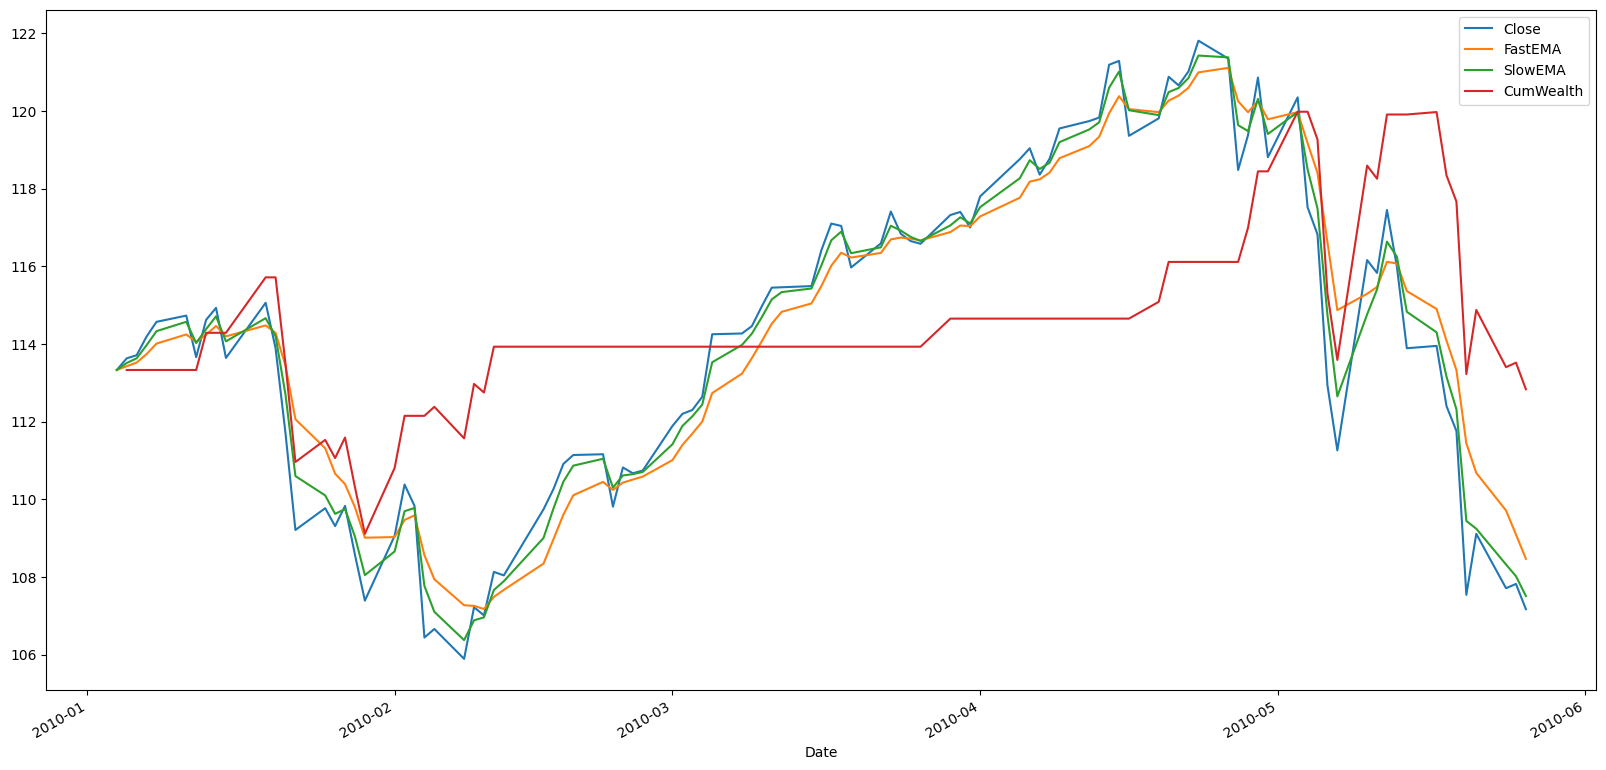

In [49]:
# Creiamo un logReturn cumulativo in tutto il periodo di investimento. Shiftiamo di 1 per ritornare al posto giusto
train["CumLogReturn"] = train["AlgoLogReturn"].cumsum().shift(1)
# Calcoliamo, sulla base del prezzo di base e del ritorno cumulativo, l'andamento dei soldi
train["CumWealth"] = train.iloc[0]["Close"] * np.exp(train["CumLogReturn"]) 
# Plottiamo
train[["Close", "FastEMA", "SlowEMA", "CumWealth"]].iloc[:100].plot(figsize=(20,10))